# Missing Values

**Import Libraries**

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer
import missingno as msno

**Read csv file**

In [2]:
df = pd.read_csv('titanic.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Check the is there any missing values in dataframe**

In [4]:
df.isnull().values.any()

True

**Check the missing values for each variable**

In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Check the filled values for each variable**

In [6]:
df.notnull().sum()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

**Observation units that have at least one missing value**

In [7]:
df[df.isnull().any(axis=1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


**Observation units that have filled value**

In [8]:
df[df.notnull().any(axis=1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


**Missing values ratio**

In [9]:
(df.isnull().sum() / df.shape[0] * 100).sort_values(ascending=False)

Cabin          77.104377
Age            19.865320
Embarked        0.224467
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
dtype: float64

## Missing Value Fuction

In [10]:
def missing_value_table(dataframe, na_name=False):
    
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df)
    
    if na_name == True:
        return na_columns

In [11]:
missing_value_table(df, na_name=False)

          n_miss  ratio
Cabin        687  77.10
Age          177  19.87
Embarked       2   0.22


In [12]:
missing_value_table(df, na_name=True)

          n_miss  ratio
Cabin        687  77.10
Age          177  19.87
Embarked       2   0.22


['Age', 'Cabin', 'Embarked']

## Solving The Missing Value Problem

### Option 1: Delete

In [13]:
df.dropna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


### Option 2: Filling with basic values like mean, median, etc.

In [14]:
df['Age'].isnull().sum()

177

In [15]:
df['Age'].fillna(df['Age'].mean())

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [16]:
df['Age'].fillna(df['Age'].mean()).isnull().sum()

0

In [17]:
df['Age'].fillna(df['Age'].median())

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [18]:
df['Age'].fillna(df['Age'].median()).isnull().sum()

0

**Fill numerical missing values by mean**

In [23]:
df.apply(lambda x: x.fillna(x.mean()) if x.dtype != 'O' else x, axis=0)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [24]:
df.apply(lambda x: x.fillna(x.mean()) if x.dtype != 'O' else x, axis=0).isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Fill categorical missing values by mode**

In [27]:
df['Embarked'].mode()[0]

'S'

In [28]:
df['Embarked'].fillna(df['Embarked'].mode()[0])

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [29]:
df['Embarked'].fillna(df['Embarked'].mode()[0]).isnull().sum()

0

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [38]:
df.apply(lambda x: x.fillna(x.mode()[0]) if ((x.dtype == 'O') and (len(x.unique()) <= 10)) else x, axis=0)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [39]:
df.apply(lambda x: x.fillna(x.mode()[0]) if ((x.dtype == 'O') and (len(x.unique()) <= 10)) else x, axis=0).isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

**Fill by groups**

In [44]:
df.groupby('Sex')['Age'].mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

In [45]:
df['Age'].fillna(df.groupby('Sex')['Age'].transform('mean'))

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    27.915709
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [46]:
df['Age'].fillna(df.groupby('Sex')['Age'].transform('mean')).isnull().sum()

0

### Option 3: Predictive assignment

In [47]:
df = pd.read_csv('titanic.csv')

In [48]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [49]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    
    cat_cols = [col for col in df.columns if str(df[col].dtype) in ['category', 'object', 'bool']]
    num_but_cat = [col for col in df.columns if str(df[col].dtype) in ['int64', 'float64'] and df[col].nunique() < cat_th]
    cat_but_car = [col for col in df.columns if str(df[col].dtype) in ['category', 'object'] and df[col].nunique() > car_th]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]
    
    num_cols = [col for col in df.columns if df[col].dtype in ['float64', 'int64']]
    num_cols = [col for col in num_cols if col not in cat_cols]
    
    print(f'Observations: {dataframe.shape[0]}')
    print(f'Variables: {dataframe.shape[1]}')
    print(f'Categorical Variables: {len(cat_cols)}')
    print(f'Numerical Variables: {len(num_cols)}')
    print(f'Categorical But Cardinal: {len(cat_but_car)}')
    print(f'Numerical But Categorical Variables: {len(num_but_cat)}')
    
    return cat_cols, num_cols, cat_but_car

In [50]:
cat_cols, num_cols, cat_but_car = grab_col_names(df, cat_th=10, car_th=20)

Observations: 891
Variables: 12
Categorical Variables: 6
Numerical Variables: 3
Categorical But Cardinal: 3
Numerical But Categorical Variables: 4


In [51]:
cat_cols

['Sex', 'Embarked', 'Survived', 'Pclass', 'SibSp', 'Parch']

In [52]:
num_cols

['PassengerId', 'Age', 'Fare']

In [53]:
num_cols.remove('PassengerId')

In [54]:
num_cols

['Age', 'Fare']

In [55]:
cat_but_car

['Name', 'Ticket', 'Cabin']

In [59]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [58]:
pd.get_dummies(df[cat_cols], drop_first=True)

,Survived,Pclass,SibSp,Parch,Sex_male,Embarked_Q,Embarked_S
0,0,3,1,0,1,0,1
1,1,1,1,0,0,0,0
2,1,3,0,0,0,0,1
3,1,1,1,0,0,0,1
4,0,3,0,0,1,0,1
...,...,...,...,...,...,...,...
886,0,2,0,0,1,0,1
887,1,1,0,0,0,0,1
888,0,3,1,2,0,0,1
889,1,1,0,0,1,0,0


In [62]:
df_dummies = pd.get_dummies(df[cat_cols + num_cols], drop_first=True)
df_dummies

,Survived,Pclass,SibSp,Parch,Age,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,1,0,22.0,7.2500,1,0,1
1,1,1,1,0,38.0,71.2833,0,0,0
2,1,3,0,0,26.0,7.9250,0,0,1
3,1,1,1,0,35.0,53.1000,0,0,1
4,0,3,0,0,35.0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,0,0,27.0,13.0000,1,0,1
887,1,1,0,0,19.0,30.0000,0,0,1
888,0,3,1,2,NaN,23.4500,0,0,1
889,1,1,0,0,26.0,30.0000,1,0,0


**Standardization of variables**

In [64]:
scaler = MinMaxScaler()

In [65]:
df_dummies = pd.DataFrame(scaler.fit_transform(df_dummies), columns=df_dummies.columns)

In [66]:
df_dummies.head()

,Survived,Pclass,SibSp,Parch,Age,Fare,Sex_male,Embarked_Q,Embarked_S
0,0.0,1.0,0.125,0.0,0.271174,0.014151,1.0,0.0,1.0
1,1.0,0.0,0.125,0.0,0.472229,0.139136,0.0,0.0,0.0
2,1.0,1.0,0.000,0.0,0.321438,0.015469,0.0,0.0,1.0
3,1.0,0.0,0.125,0.0,0.434531,0.103644,0.0,0.0,1.0
4,0.0,1.0,0.000,0.0,0.434531,0.015713,1.0,0.0,1.0


**Apply KNN**

In [68]:
imputer = KNNImputer(n_neighbors=5)

In [69]:
df_dummies = pd.DataFrame(imputer.fit_transform(df_dummies), columns=df_dummies.columns)
df_dummies.head()

,Survived,Pclass,SibSp,Parch,Age,Fare,Sex_male,Embarked_Q,Embarked_S
0,0.0,1.0,0.125,0.0,0.271174,0.014151,1.0,0.0,1.0
1,1.0,0.0,0.125,0.0,0.472229,0.139136,0.0,0.0,0.0
2,1.0,1.0,0.000,0.0,0.321438,0.015469,0.0,0.0,1.0
3,1.0,0.0,0.125,0.0,0.434531,0.103644,0.0,0.0,1.0
4,0.0,1.0,0.000,0.0,0.434531,0.015713,1.0,0.0,1.0


In [70]:
df_dummies = pd.DataFrame(scaler.inverse_transform(df_dummies), columns=df_dummies.columns)
df_dummies.head()

,Survived,Pclass,SibSp,Parch,Age,Fare,Sex_male,Embarked_Q,Embarked_S
0,0.0,3.0,1.0,0.0,22.0,7.2500,1.0,0.0,1.0
1,1.0,1.0,1.0,0.0,38.0,71.2833,0.0,0.0,0.0
2,1.0,3.0,0.0,0.0,26.0,7.9250,0.0,0.0,1.0
3,1.0,1.0,1.0,0.0,35.0,53.1000,0.0,0.0,1.0
4,0.0,3.0,0.0,0.0,35.0,8.0500,1.0,0.0,1.0


**Compare**

In [71]:
df['age_imputed_knn'] = df_dummies['Age']

In [72]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_imputed_knn
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0


In [74]:
df.loc[df['Age'].isnull(), ['Age', 'age_imputed_knn']]

,Age,age_imputed_knn
5,NaN,47.8
17,NaN,37.6
19,NaN,12.2
26,NaN,32.8
28,NaN,17.6
...,...,...
859,NaN,25.8
863,NaN,8.8
868,NaN,25.0
878,NaN,24.4


### Advanced Analysis

In [83]:
df = pd.read_csv('titanic.csv')

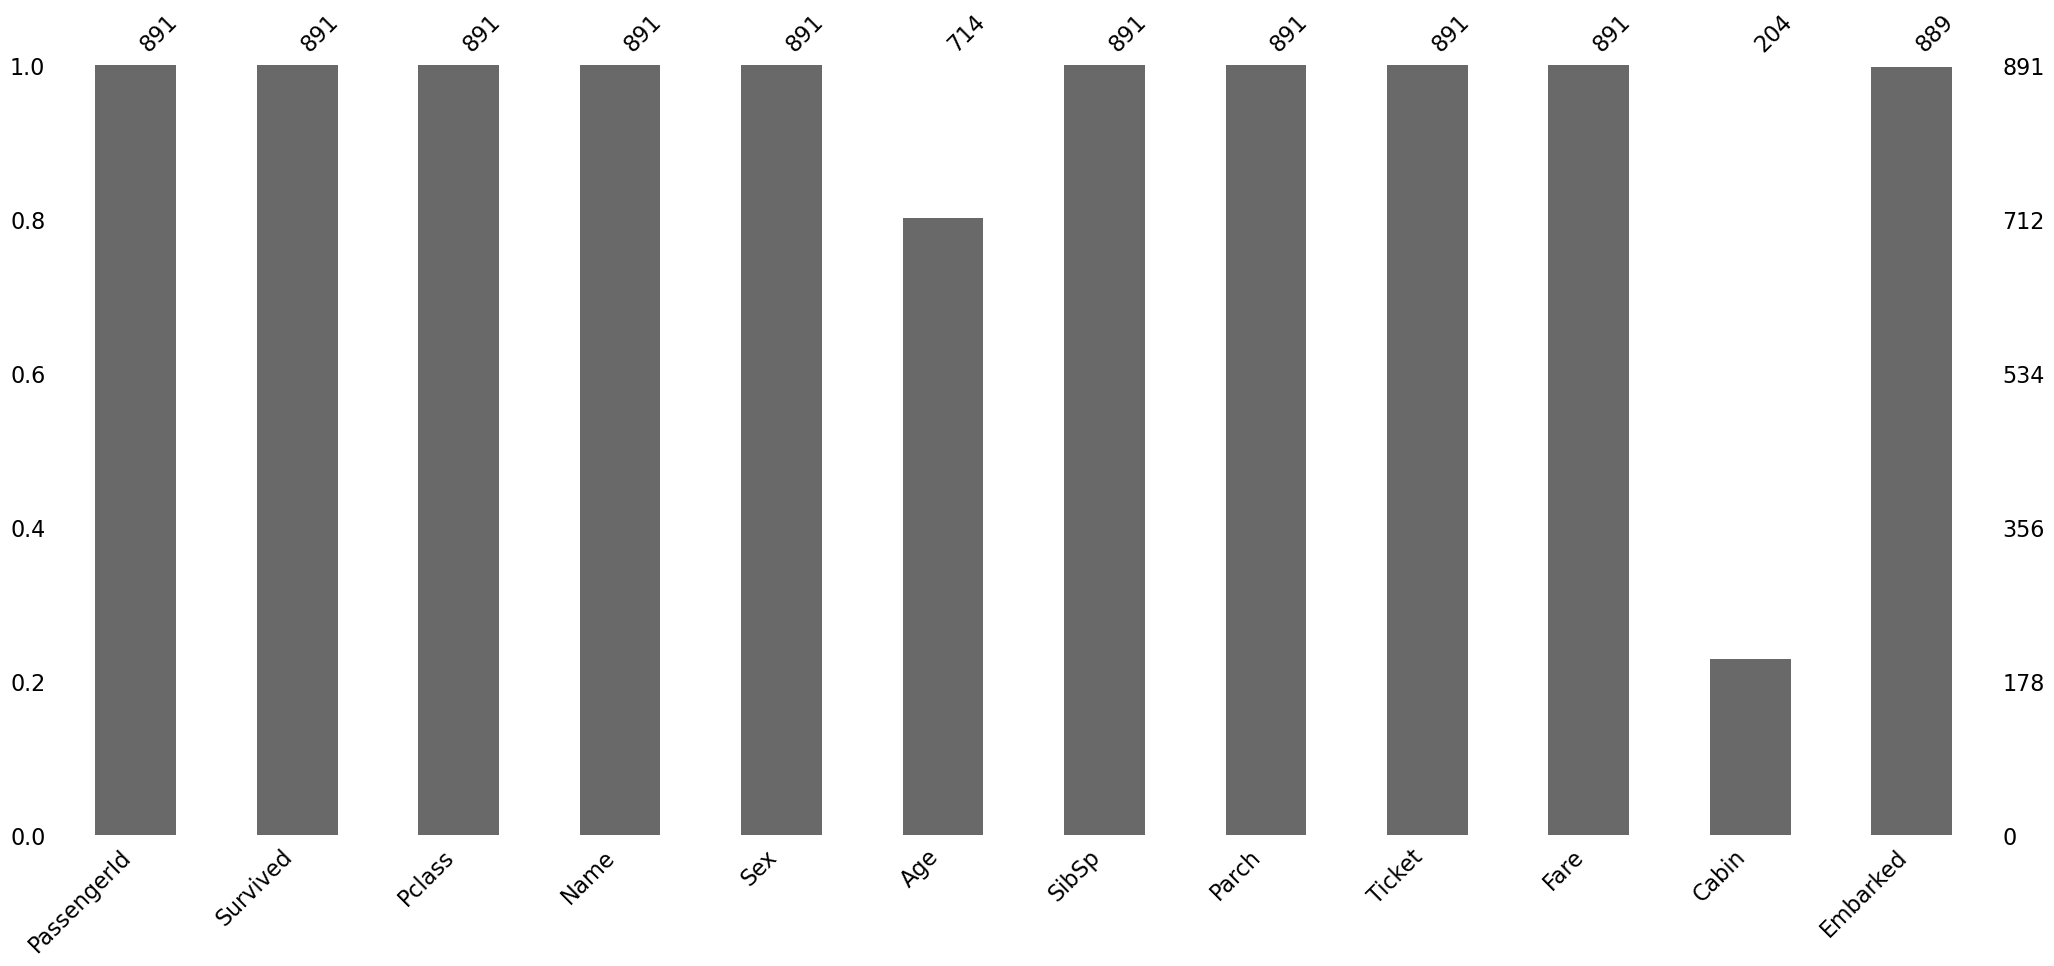

In [86]:
msno.bar(df)
plt.show()

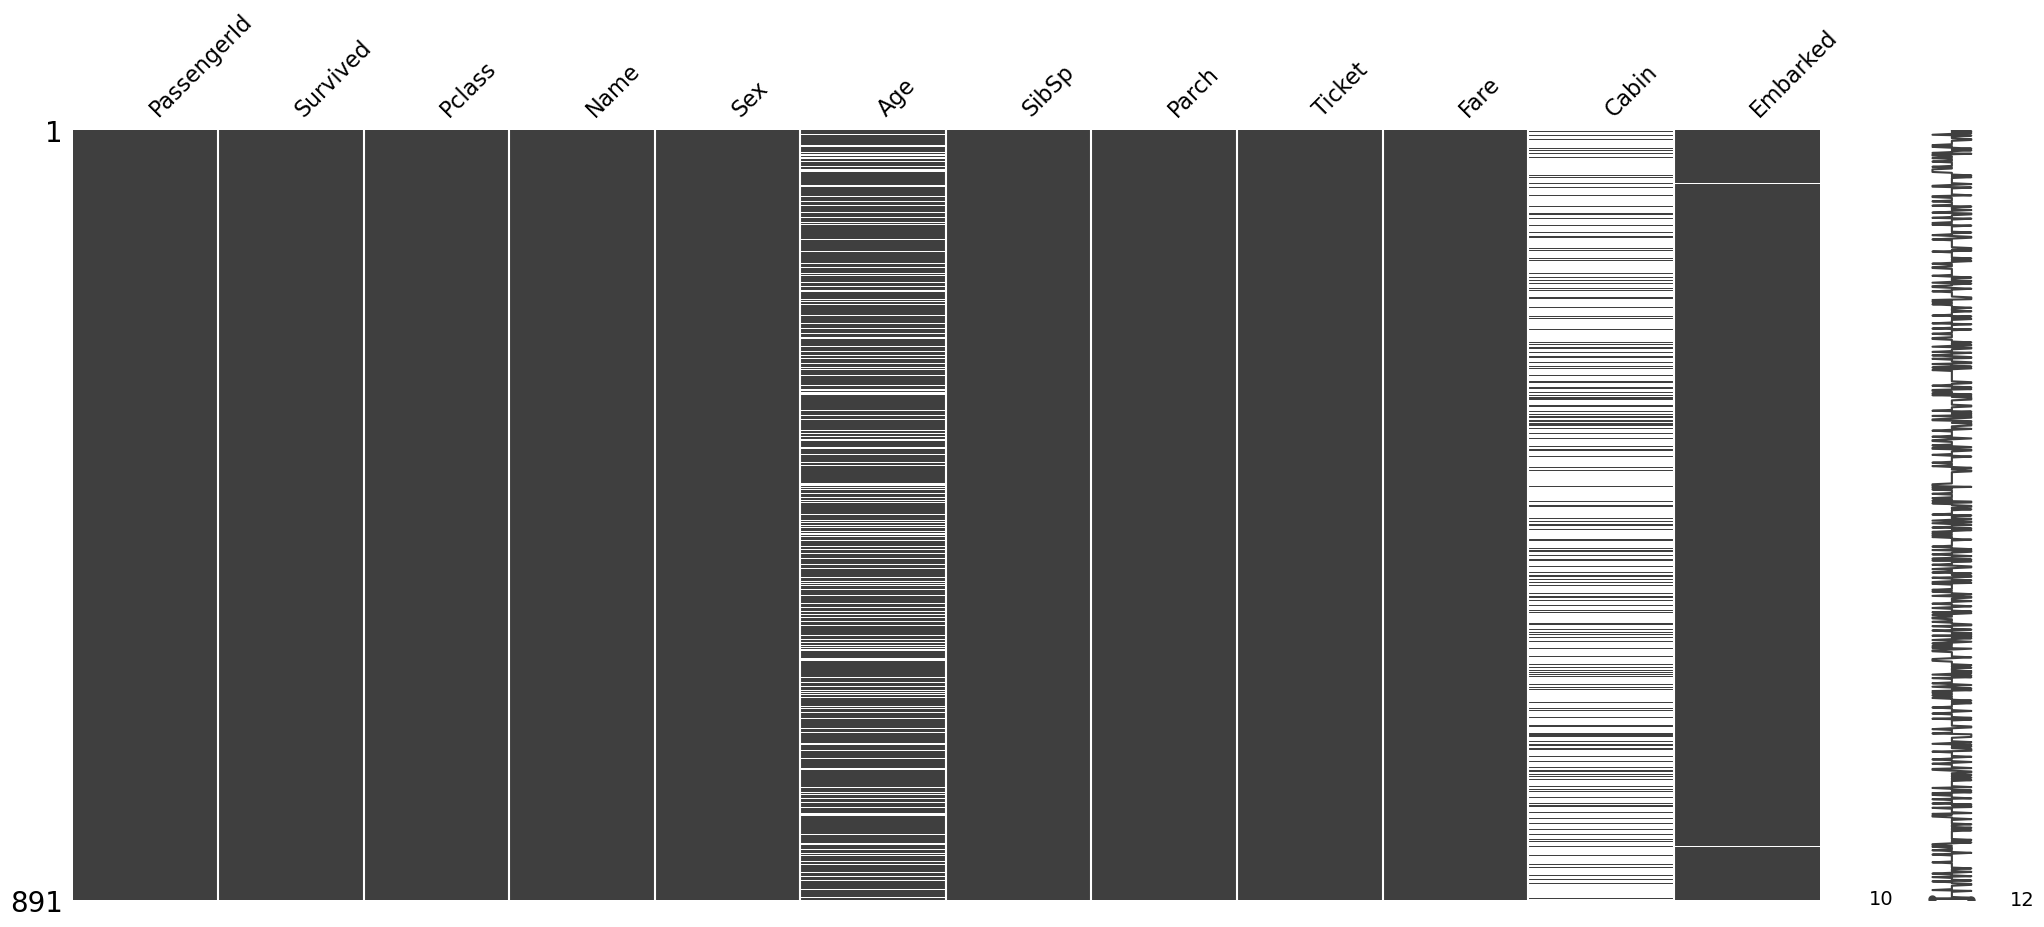

In [87]:
msno.matrix(df)
plt.show()

**Missing Value Correlation**

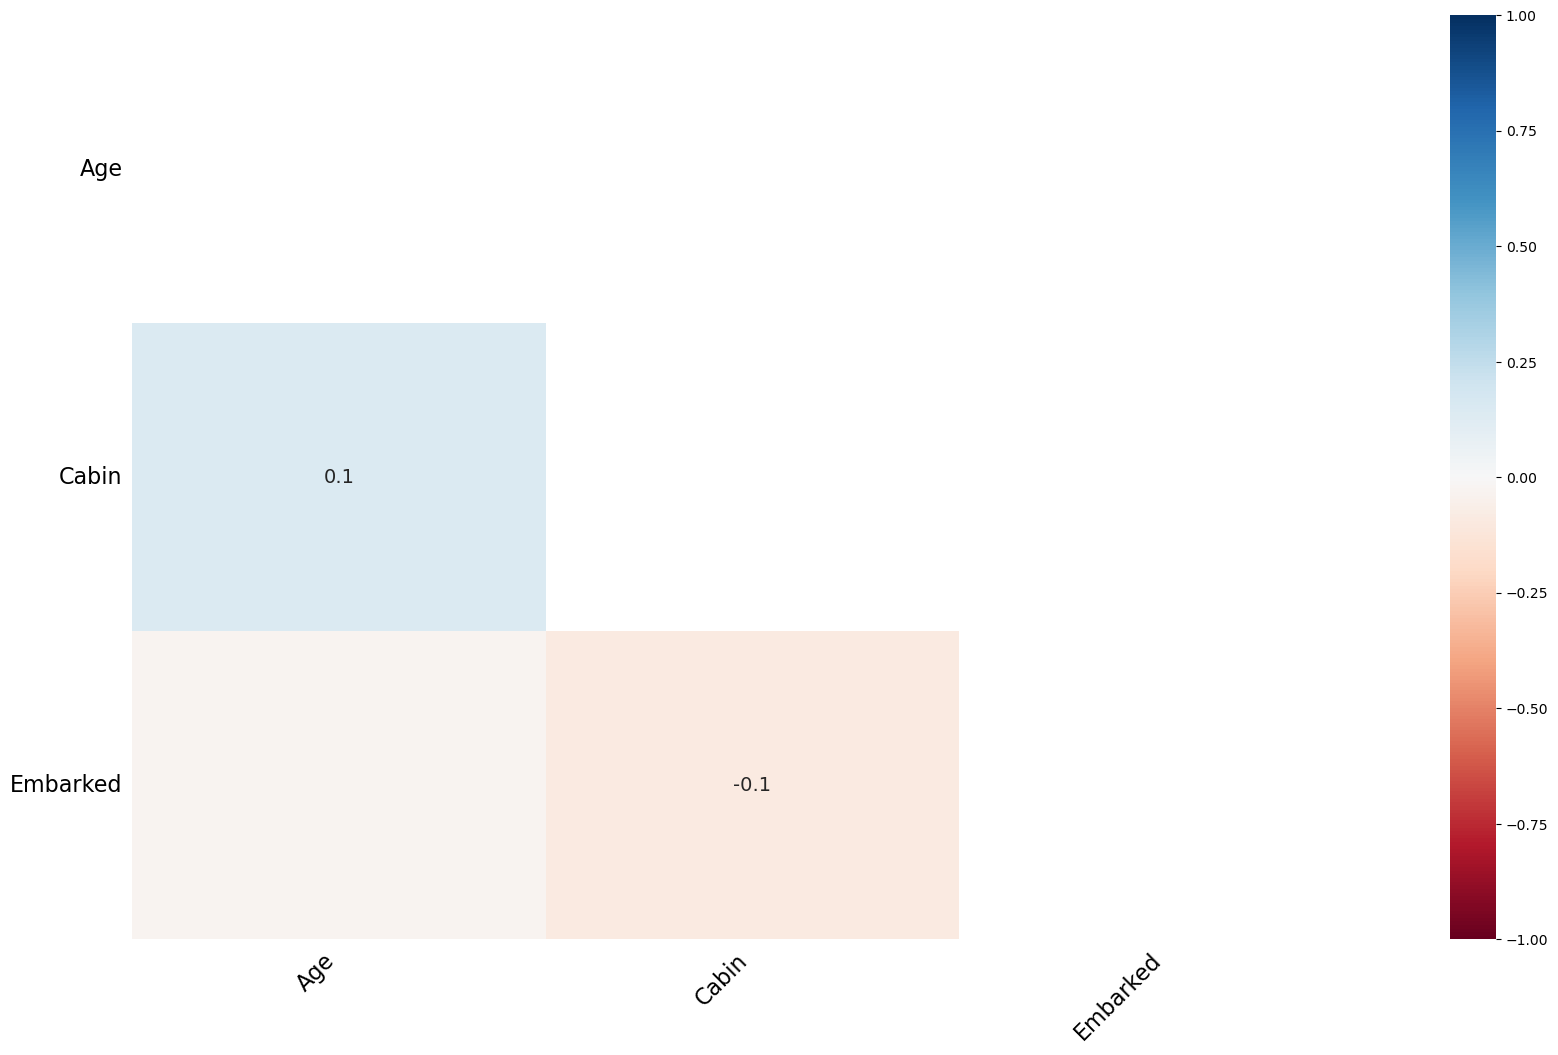

In [88]:
msno.heatmap(df)
plt.show()

In [90]:
missing_value_table(df)

          n_miss  ratio
Cabin        687  77.10
Age          177  19.87
Embarked       2   0.22


In [93]:
na_cols = missing_value_table(df, True)

          n_miss  ratio
Cabin        687  77.10
Age          177  19.87
Embarked       2   0.22


In [94]:
def missing_vs_target(dataframe, target, na_columns):
    temp_df = dataframe.copy()

    for col in na_columns:
        temp_df[col + '_NA_FLAG'] = np.where(temp_df[col].isnull(), 1, 0)

    na_flags = temp_df.loc[:, temp_df.columns.str.contains("_NA_")].columns

    for col in na_flags:
        print(pd.DataFrame({"TARGET_MEAN": temp_df.groupby(col)[target].mean(),
                            "Count": temp_df.groupby(col)[target].count()}), end="\n\n\n")

In [96]:
missing_vs_target(df, "Survived", na_cols)

             TARGET_MEAN  Count
Age_NA_FLAG                    
0               0.406162    714
1               0.293785    177


               TARGET_MEAN  Count
Cabin_NA_FLAG                    
0                 0.666667    204
1                 0.299854    687


                  TARGET_MEAN  Count
Embarked_NA_FLAG                    
0                    0.382452    889
1                    1.000000      2


